<a href="https://colab.research.google.com/github/gagan3754/Elevate-Projects-/blob/main/Elevate_labs_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [10]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df['Cabin']=df['Cabin'].fillna('Unknown')

In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


3.Convert categorical features into numerical using encoding.


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [14]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [15]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'] = le.fit_transform(df['Cabin'])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,False,True


In [18]:
df.drop(columns='Name',inplace=True)

In [19]:
df['Embarked_Q']=df['Embarked_Q'].astype('int')

In [20]:
df['Embarked_S']=df['Embarked_S'].astype('int')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,8,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,8,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,8,0,1


In [22]:
df.drop(columns='Ticket',inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,8,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,0,0
2,3,1,3,1,26.0,0,0,7.9250,8,0,1
3,4,1,1,1,35.0,1,0,53.1000,2,0,1
4,5,0,3,0,35.0,0,0,8.0500,8,0,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,-0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.522067,-0.307562,0.615838
1,-1.726220,1.266990,-1.566107,1.355574,0.663861,0.432793,-0.473674,0.786845,-1.917594,-0.307562,-1.623803
2,-1.722332,1.266990,0.827377,1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.522067,-0.307562,0.615838
3,-1.718444,1.266990,-1.566107,1.355574,0.433312,0.432793,-0.473674,0.420730,-1.917594,-0.307562,0.615838
4,-1.714556,-0.789272,0.827377,-0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.522067,-0.307562,0.615838


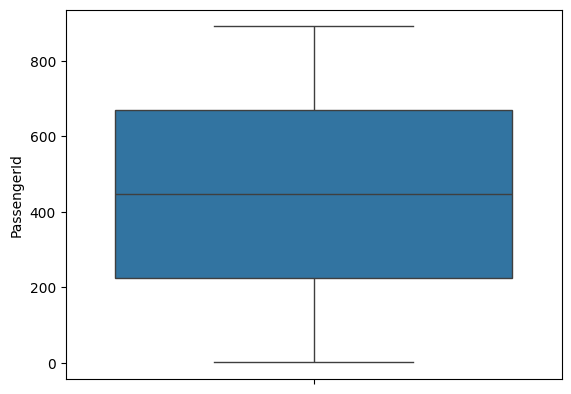

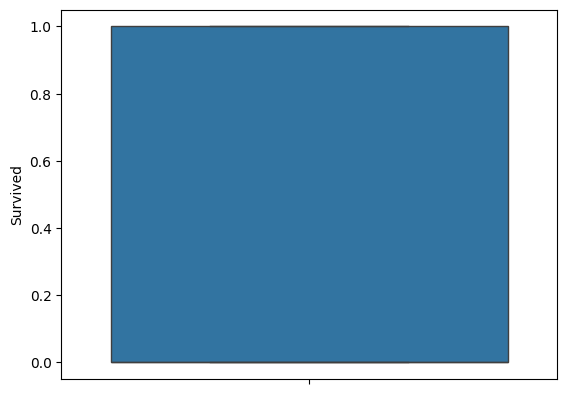

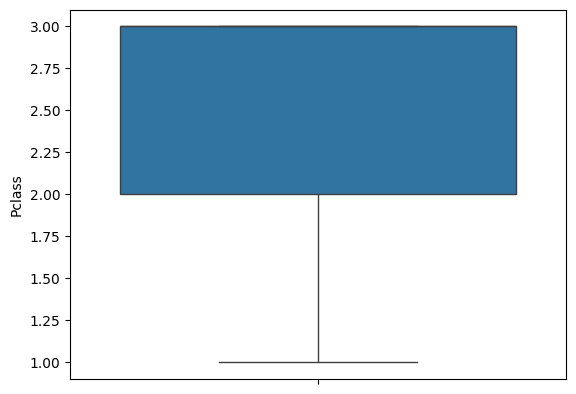

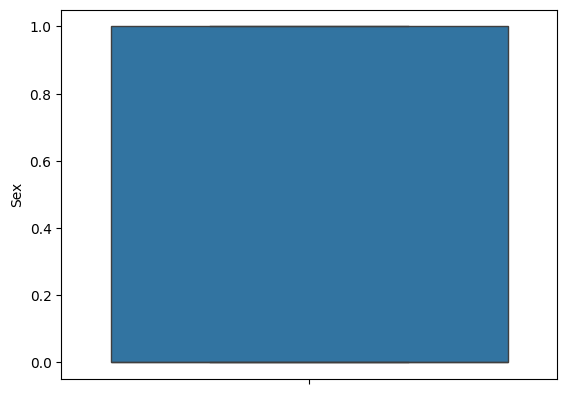

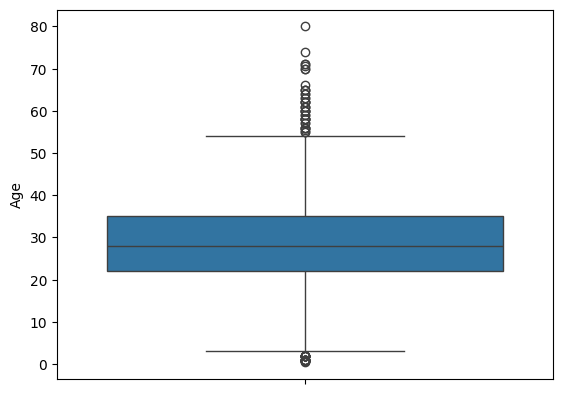

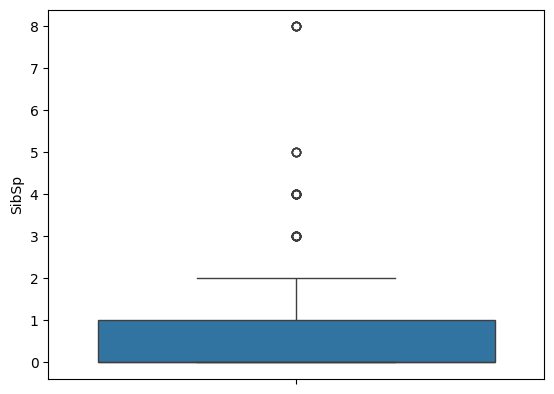

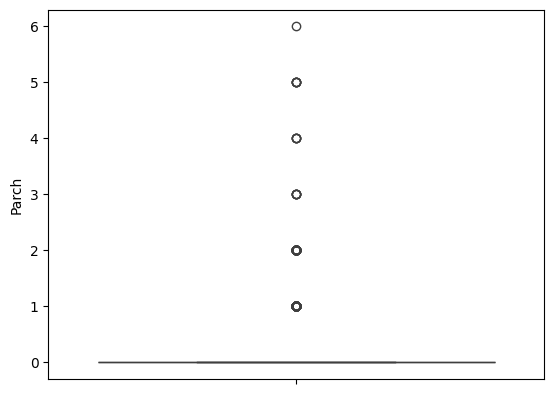

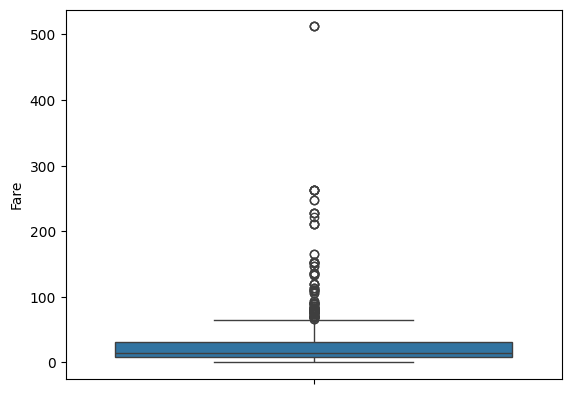

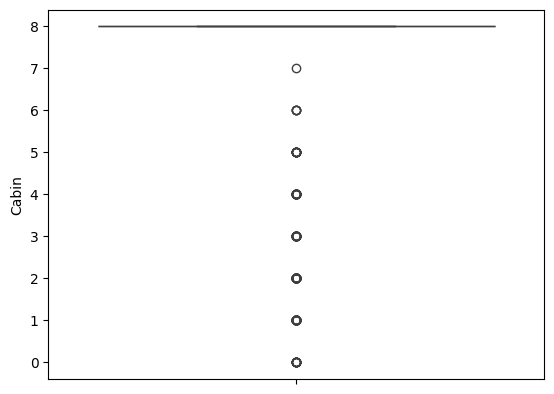

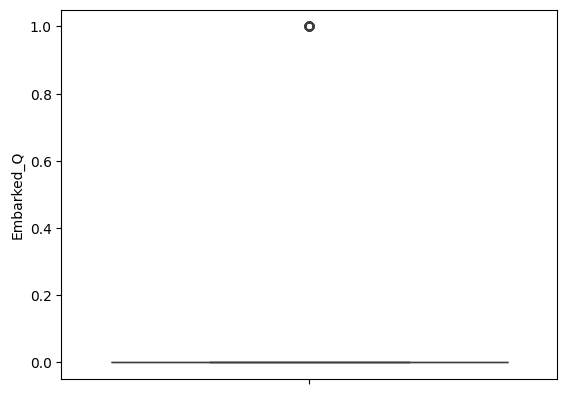

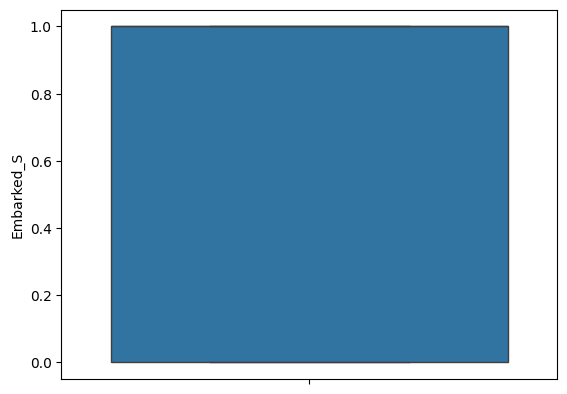

In [26]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [27]:
df.shape

(891, 11)

In [28]:
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)

  IQR=Q3-Q1

  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR

  df=df[(df[i]>=lower)&(df[i]<=upper)]

In [29]:
df.shape

(365, 11)